In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, precision_recall_curve, roc_curve, auc
%matplotlib inline
import warnings
from xgboost import XGBRFClassifier
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
dfremove = df.drop(['V15','V20','V22','V23','V25','V28'], axis=1)

In [4]:
X = dfremove.iloc[:, :-1]
y = dfremove.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Create an instance of SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)

# Resample the training set
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

In [6]:
clf = XGBRFClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=42,
                reg_alpha=None, ...)

In [7]:
y_pred = clf.predict(X_test)

In [8]:
# Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)


Confusion matrix:
 [[56411   453]
 [   10    88]]
Recall: 0.8979591836734694
Precision: 0.16266173752310537
Specificity: 0.9920336240855374
F1-score: 0.2754303599374022
ROC-AUC score: 0.9449964038795035
Precision-recall score: 0.14623915667473614


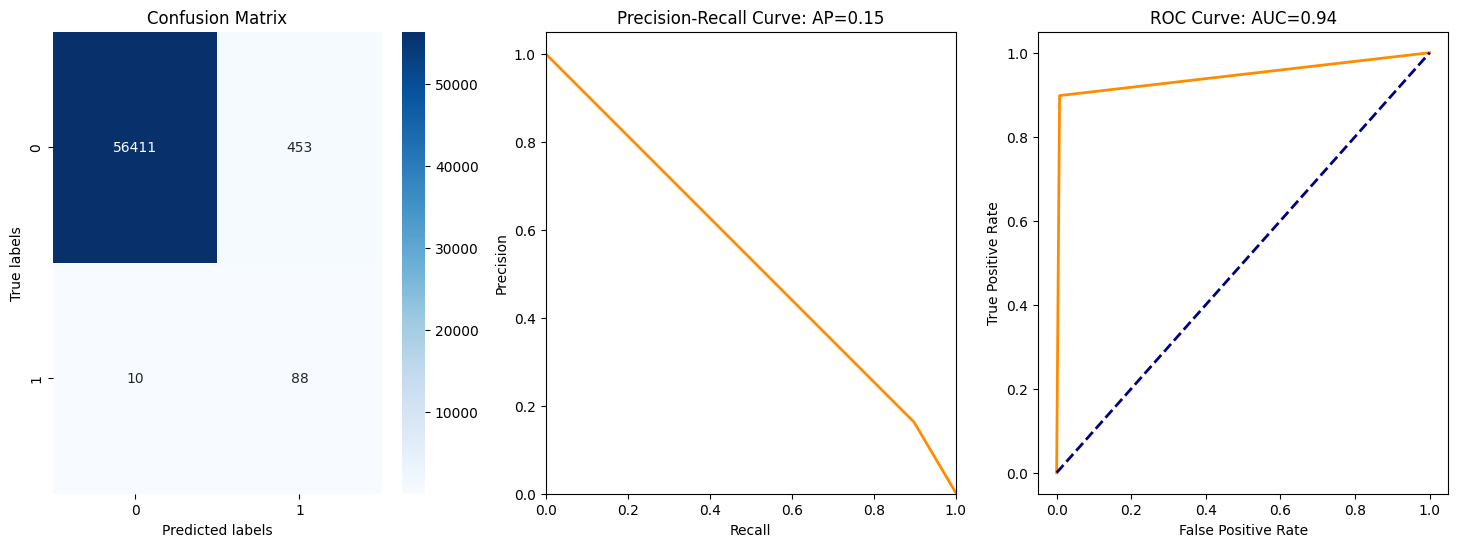

In [9]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_mat)

# Calculate the recall, precision, specificity, F1 score, and ROC-AUC score
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Recall:', recall)
print('Precision:', precision)
print('Specificity:', specificity)
print('F1-score:', f1)
print('ROC-AUC score:', roc_auc)
# Calculate the precision-recall curve and average precision score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)
print('Precision-recall score:', pr_auc)
# Create plots for the confusion matrix, precision-recall curve, and ROC curve
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', ax=ax[0])
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].set_title('Confusion Matrix')

# Plot the precision-recall curve
ax[1].plot(recall, precision, color='darkorange', lw=2)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlim([0.0, 1.0])
ax[1].set_title('Precision-Recall Curve: AP={0:0.2f}'.format(pr_auc))

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
ax[2].plot(fpr, tpr, color='darkorange', lw=2)
ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[2].set_xlabel('False Positive Rate')
ax[2].set_ylabel('True Positive Rate')
ax[2].set_title('ROC Curve: AUC={0:0.2f}'.format(roc_auc))
plt.show()
